In [5]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#1.导入数据
data_train = pd.read_csv('./train_data.csv')
data_train['Type'] = 'Train'
data_test = pd.read_csv('./test_a.csv')
data_test['Type'] = 'Test'
data_all = pd.concat([data_train, data_test], ignore_index=True)
data_all.head(5)

,ID,Type,area,bankNum,buildYear,busStationNum,city,communityName,drugStoreNum,gymNum,...,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeMoney,tradeNewMeanPrice,tradeNewNum,tradeSecNum,tradeTime,uv
0,100309852,Train,68.06,16,1953,36,SH,XQ00051,12,15,...,28248,0.0,0,47974.22551,2000.0,104573.48460,25,111,2018/11/28,284.0
1,100307942,Train,125.55,16,2007,184,SH,XQ00130,27,5,...,14823,0.0,0,40706.66775,2000.0,33807.53497,2,2,2018/12/16,22.0
2,100307764,Train,132.00,37,暂无信息,60,SH,XQ00179,24,35,...,77645,0.0,0,34384.35089,16000.0,109734.16040,11,555,2018/12/22,20.0
3,100306518,Train,57.00,47,暂无信息,364,SH,XQ00313,83,30,...,8750,108037.8,1,20529.55050,1600.0,30587.07058,58,260,2018/12/21,279.0
4,100305262,Train,129.00,10,暂无信息,141,SH,XQ01257,21,5,...,800,0.0,0,24386.36577,2900.0,51127.32846,34,38,2018/11/18,480.0


In [26]:
print(data_all.info())
print(data_all.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43909 entries, 0 to 43908
Data columns (total 52 columns):
ID                    43909 non-null int64
Type                  43909 non-null object
area                  43909 non-null float64
bankNum               43909 non-null int64
buildYear             43909 non-null object
busStationNum         43909 non-null int64
city                  43909 non-null object
communityName         43909 non-null object
drugStoreNum          43909 non-null int64
gymNum                43909 non-null int64
hospitalNum           43909 non-null int64
houseDecoration       43909 non-null object
houseFloor            43909 non-null object
houseToward           43909 non-null object
houseType             43909 non-null object
interSchoolNum        43909 non-null int64
landMeanPrice         43909 non-null float64
landTotalPrice        43909 non-null int64
lookNum               43909 non-null int64
mallNum               43909 non-null int64
newWorkers         

In [66]:
#2.缺失值分析
def missing_values(df):
    alldata_na = pd.DataFrame(df.isnull().sum(), columns = {'missingNum'})
    alldata_na['existNum'] = len(df) - alldata_na['missingNum']
    alldata_na['sum'] = len(df)
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(df)
    alldata_na['dtype'] = df.dtypes
    #ascending：默认True升序排列；False降序排列
    alldata_na = alldata_na[alldata_na['missingNum']>0].reset_index().sort_values(by=['missingNum','index'],ascending=[False,True])
    alldata_na.set_index('index',inplace=True)
    return alldata_na
missing_values(data_train)

,missingNum,existNum,sum,missingRatio,dtype
index,,,,,
pv,18,41422,41440,0.000434,float64
uv,18,41422,41440,0.000434,float64


In [77]:
#3.单调特征分析
#是否有单调特征列(单调的特征列很大可能是时间)
def incresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] > vals[i]:
            cnt += 1
    return cnt

fea_cols = [col for col in data_train.columns]
for col in fea_cols:
    cnt = incresing(data_train[col].values)
    if cnt / data_train.shape[0] >= 0.55:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / data_train.shape[0])

单调特征： tradeTime
单调特征值个数： 24085
单调特征值比例： 0.5812017374517374


In [ ]:
#4.特征nunique分布
categorical_feas = ['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward', 'houseDecoration',
    'communityName','city','region','plate','buildYear']
# 特征nunique分布
for feature in categorical_feas:
    print(feature + "的特征分布如下：")
    print(data_train[feature].value_counts())
    if feature != 'communityName': # communityName值太多，暂且不看图表
        plt.hist(data_all[feature], bins=3)
        plt.show()

In [86]:
#5.统计特征值出现频次大于100的特征
for feature in categorical_feas:
    df_value_counts = pd.DataFrame(data_train[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature, 'counts'] # change column names
    print(df_value_counts[df_value_counts['counts'] >= 100])

  rentType  counts
0     未知方式   30759
1       整租    5472
2       合租    5204
   houseType  counts
0     1室1厅1卫    9805
1     2室1厅1卫    8512
2     2室2厅1卫    6783
3     3室1厅1卫    3992
4     3室2厅2卫    2737
5     4室1厅1卫    1957
6     3室2厅1卫    1920
7     1室0厅1卫    1286
8     1室2厅1卫     933
9     2室2厅2卫     881
10    4室2厅2卫     435
11    2室0厅1卫     419
12    4室2厅3卫     273
13    5室1厅1卫     197
14    2室1厅2卫     155
15    3室2厅3卫     149
16    3室1厅2卫     135
  houseFloor  counts
0          中   15458
1          高   14066
2          低   11916
     region  counts
0   RG00002   11437
1   RG00005    5739
2   RG00003    4186
3   RG00010    3640
4   RG00012    3368
5   RG00004    3333
6   RG00006    1961
7   RG00007    1610
8   RG00008    1250
9   RG00013    1215
10  RG00001    1157
11  RG00014    1069
12  RG00011     793
13  RG00009     681
      plate  counts
0   BK00031    1958
1   BK00033    1837
2   BK00045    1816
3   BK00055    1566
4   BK00056    1516
5   BK00052    1375
6   BK00017    1305
7 

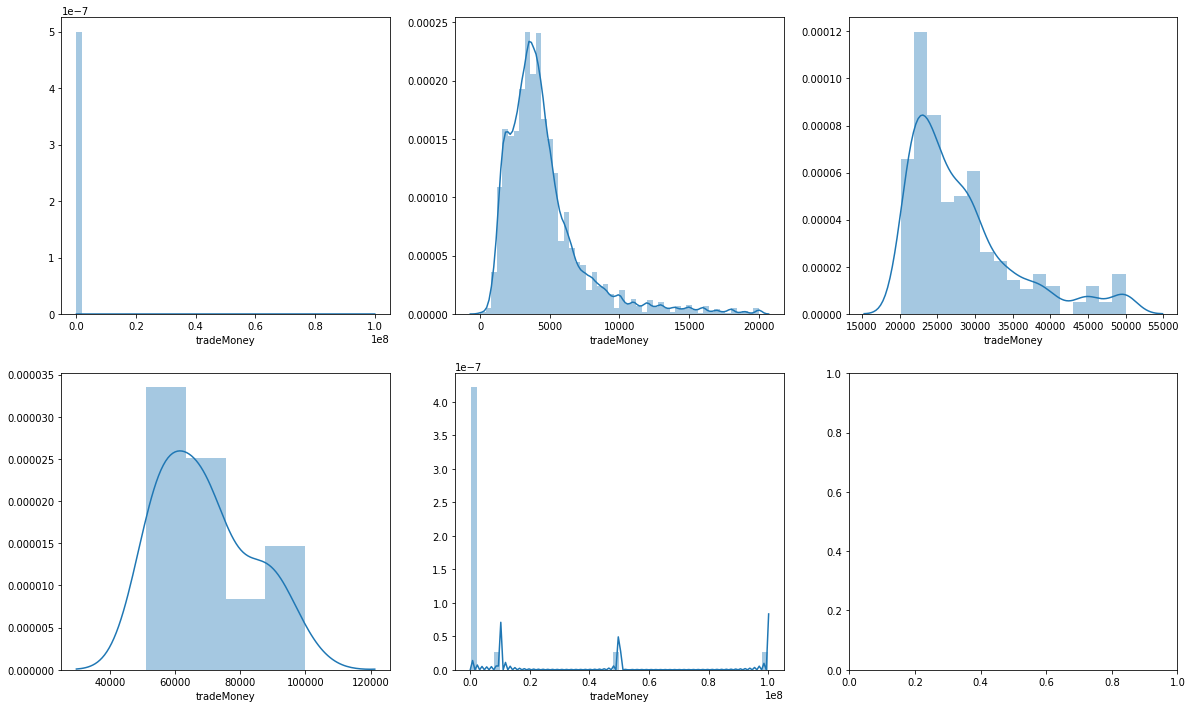

In [87]:
#6.Labe 分布
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMoney'],ax=axes[0][0])
sns.distplot(data_train[(data_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data_train[(data_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])